In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [5]:
def separar_etiquetas(df, *args):
    """
        Funcion que separa las columnas en X e y
        La primera etiqueta se considera etiqueta objetivo
    """
    etiquetas = list(args)
    X = df.drop(etiquetas, axis=1)
    y = df[etiquetas[0]] # Etiqueta objetivo
    
    return (X, y)

In [6]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [7]:
df = pd.read_csv('dataset/dataset_con_atrib_no_dup.csv') # Dataset final sin duplicados

In [8]:
df_copy = df.copy()

In [9]:
df_copy

,url,type,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,contiene_https,contiene_ip,contiene_php,contiene_html,contiene_doble_barras,profundidad_de_la_ruta,acortadores_de_url,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia
0,http://www.osn-solutions.nl/index.php/nl/over-osn,defacement,49,20,22,0,0,0,1,0,0,3,0,0,8,0,-1,4.012598
1,http://msb.jcw.mybluehost.me/web.html,phishing,37,21,9,0,0,0,0,1,0,1,0,0,5,2803,118,3.884601
2,https://sites.google.com/view/qwzxvcax/home,phishing,43,16,19,0,1,0,0,0,0,3,0,0,5,9764,1557,4.144418
3,https://pub-fc6dc735ff68445cae5ca2d946a8bfbb.r...,phishing,61,43,10,0,1,0,0,1,0,1,0,16,5,655,440,4.716982
4,https://tinyurl.com/4vz6vmm2/a.html?syl=1x165b...,phishing,125,11,16,89,1,0,0,1,0,2,1,32,11,8169,1692,5.429293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,http://smgtc.com/old/PMV/,phishing,25,9,9,0,0,0,0,0,0,3,0,0,4,4645,103,3.749275
19130,https://mitsui-jyuku.mixh.jp/uploads/3601q2w3e...,malware,56,20,28,0,1,0,0,0,0,2,0,9,6,2143,51,4.663800
19131,https://bt-mail-service-f245c0.webflow.io/,phishing,42,33,1,0,1,0,0,0,0,0,0,4,6,4050,1428,4.445307
19132,http://111.43.223.83:56977/Mozi.m,malware,33,13,7,0,0,1,0,0,0,1,0,15,6,0,-1,4.127283


In [10]:
from sklearn.preprocessing import LabelEncoder

# Cargar las clases codificadas
le = LabelEncoder()
le.classes_ = np.load('gui/escalador_encoder/clases_le.npy', allow_pickle=True)

In [11]:
# Codificar la columna type a categorica
# Las asignaciones son:
# {0: 'benign', 1: 'defacement', 2: 'malware', 3: 'phishing'}

df_copy['clases'] = le.transform(df_copy['type'])

In [12]:
df_copy

,url,type,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,contiene_https,contiene_ip,contiene_php,contiene_html,contiene_doble_barras,profundidad_de_la_ruta,acortadores_de_url,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia,clases
0,http://www.osn-solutions.nl/index.php/nl/over-osn,defacement,49,20,22,0,0,0,1,0,0,3,0,0,8,0,-1,4.012598,1
1,http://msb.jcw.mybluehost.me/web.html,phishing,37,21,9,0,0,0,0,1,0,1,0,0,5,2803,118,3.884601,3
2,https://sites.google.com/view/qwzxvcax/home,phishing,43,16,19,0,1,0,0,0,0,3,0,0,5,9764,1557,4.144418,3
3,https://pub-fc6dc735ff68445cae5ca2d946a8bfbb.r...,phishing,61,43,10,0,1,0,0,1,0,1,0,16,5,655,440,4.716982,3
4,https://tinyurl.com/4vz6vmm2/a.html?syl=1x165b...,phishing,125,11,16,89,1,0,0,1,0,2,1,32,11,8169,1692,5.429293,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,http://smgtc.com/old/PMV/,phishing,25,9,9,0,0,0,0,0,0,3,0,0,4,4645,103,3.749275,3
19130,https://mitsui-jyuku.mixh.jp/uploads/3601q2w3e...,malware,56,20,28,0,1,0,0,0,0,2,0,9,6,2143,51,4.663800,2
19131,https://bt-mail-service-f245c0.webflow.io/,phishing,42,33,1,0,1,0,0,0,0,0,0,4,6,4050,1428,4.445307,3
19132,http://111.43.223.83:56977/Mozi.m,malware,33,13,7,0,0,1,0,0,0,1,0,15,6,0,-1,4.127283,2


In [13]:
X, y = separar_etiquetas(df_copy, 'clases', 'url', 'type')

In [14]:
scaler = MinMaxScaler(feature_range=(0,1)) # Escalador rango en 0 y 1

In [15]:
# Extraer muestras de cada clase
y_ben = y[y==0]
y_def = y[y==1]
y_mal = y[y==2]
y_phi = y[y==3]

In [16]:
# Extraer 10 muestras de cada clase
idx0 = np.random.choice(y_ben.index, size=10, replace=False)
idx1 = np.random.choice(y_def.index, size=10, replace=False)
idx2 = np.random.choice(y_mal.index, size=10, replace=False)
idx3 = np.random.choice(y_phi.index, size=10, replace=False)

In [17]:
# Unir los indices
idx = np.concatenate([idx0, idx1, idx2, idx3])

# Crear un subconjunto pequeño de 200 muestras
X_subset = X.loc[idx]
y = y.loc[idx]

In [18]:
X_subset

,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,contiene_https,contiene_ip,contiene_php,contiene_html,contiene_doble_barras,profundidad_de_la_ruta,acortadores_de_url,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia
5127,23,15,1,0,0,0,0,0,0,0,0,0,3,9249,612,3.675311
1230,84,28,49,0,0,0,0,0,0,5,0,7,12,9215,281,4.430427
8098,25,18,0,0,0,0,0,0,0,0,0,0,2,7934,205,3.863465
16796,24,16,1,0,0,0,0,0,0,0,0,0,3,261,104,3.542481
4721,54,19,23,4,0,0,0,0,0,2,0,2,6,9099,397,4.513785
10125,32,24,1,0,0,0,0,0,0,0,0,0,3,0,-1,3.905639
12872,26,18,1,0,0,0,0,0,0,0,0,0,3,10590,1,3.632192
112,25,18,0,0,0,0,0,0,0,0,0,0,2,8919,212,3.593270
3909,24,17,0,0,0,0,0,0,0,0,0,0,2,8610,904,3.886842
11360,83,17,59,0,0,0,0,0,0,6,0,4,9,10404,187,4.300412


In [19]:
y

5127     0
1230     0
8098     0
16796    0
4721     0
10125    0
12872    0
112      0
3909     0
11360    0
3693     1
18579    1
15975    1
7079     1
18689    1
18837    1
6645     1
12563    1
18076    1
14010    1
7871     2
4175     2
14099    2
11777    2
17157    2
5641     2
6469     2
4845     2
10377    2
15796    2
10141    3
10043    3
8690     3
10722    3
5313     3
10257    3
17683    3
5341     3
17443    3
16318    3
Name: clases, dtype: int32

In [20]:
X_scaled = scaler.fit_transform(X_subset)

In [21]:
pca = PCA(n_components=2) 
X = pca.fit_transform(X_scaled) # Reducir a 2 dimensionalidad la entrada tras escalar X

In [23]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X, y)

RandomForestClassifier(random_state=42)

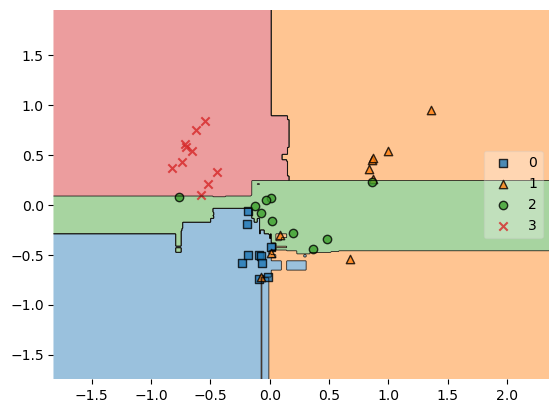

In [24]:
plot_decision_regions(X, y.to_numpy(), clf=clf_rf, legend=5)
plt.show()

In [26]:
nn = Sequential()

nn.add(Dense(300, input_dim=2, activation='relu'))
nn.add(Dense(200, activation="relu"))
nn.add(Dense(100, activation="relu"))
nn.add(Dense(4, activation='softmax'))

nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Recall'])

historia = nn.fit(X, to_categorical(y), epochs=10, batch_size=5, validation_split=0.1)


Epoch 1/10


8/8 [==============================] - 2s 61ms/step - loss: 1.3628 - recall: 0.0000e+00 - val_loss: 1.0566 - val_recall: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 1.2213 - recall: 0.0000e+00 - val_loss: 0.8305 - val_recall: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 1.0884 - recall: 0.1667 - val_loss: 0.5508 - val_recall: 0.7500
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.9423 - recall: 0.3333 - val_loss: 0.3272 - val_recall: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.8456 - recall: 0.5000 - val_loss: 0.1999 - val_recall: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7640 - recall: 0.5556 - val_loss: 0.1681 - val_recall: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6980 - recall: 0.5833 - val_loss: 0.2190 - val_recall: 1.0000
Epoch 8/10
8/8 [==========================

9600/9600 [==============================] - 16s 2ms/step


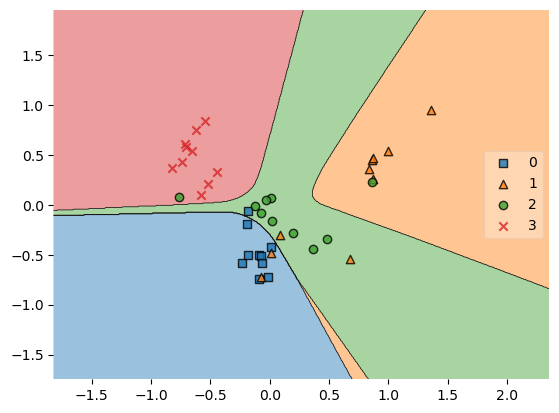

In [27]:
model_no_ohe = Onehot2Int(nn) # Conversión necesaria en redes neuronales segun la documentacion

plot_decision_regions(X, y.to_numpy(), clf=model_no_ohe, legend=5)
plt.show()

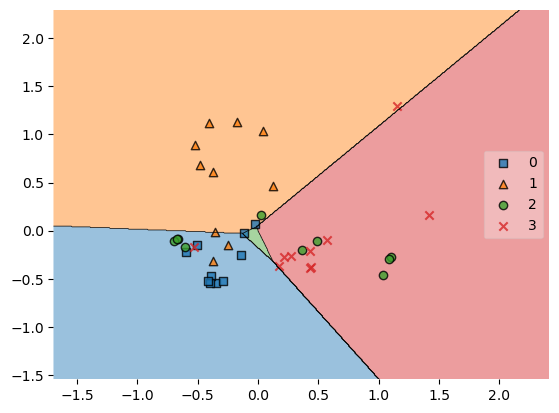

In [22]:
clf_svm = LinearSVC(random_state=42)
clf_svm.fit(X, y)
plot_decision_regions(X, y.to_numpy(), clf=clf_svm, legend=5)
plt.show()

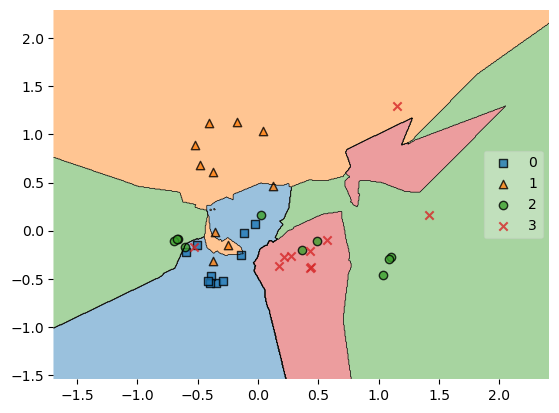

In [23]:
clf_kn = KNeighborsClassifier()
clf_kn.fit(X, y)
plot_decision_regions(X, y.to_numpy(), clf=clf_kn, legend=5)
plt.show()

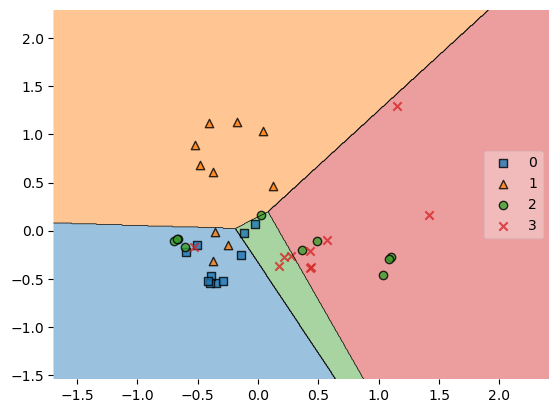

In [24]:
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X, y)
plot_decision_regions(X, y.to_numpy(), clf=clf_lr, legend=5)
plt.show()